# PyTorch Computer Vision



## 0. Computer Vision Libraries

* `torchvision` - base domain library
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a datset.

In [1]:
# Base PyTorch
import torch
from torch import nn

# Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Vizualizations
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.3.1
0.18.1


## 1. Getting a dataset

The data we will be using is FashionMNIST dataset, an advanced version of the classic MNIST, but on clothing instead of numbers.

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
  root="data", # where to store the data?
  train=True, # do we need training dataset?
  download=True, # download or not?
  transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
  target_transform=None # how do we want to transform the labels
  
)

test_data = datasets.FashionMNIST(
  root="data", # where to store the data?
  train=False, # do we need training dataset?
  download=True, # download or not?
  transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
  target_transform=None # how do we want to transform the labels
  
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# Get all the clothing item names
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
# Check shape of our image
print(f"Image shape: {image.shape} -> [color channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


### 1.2 Visualiing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

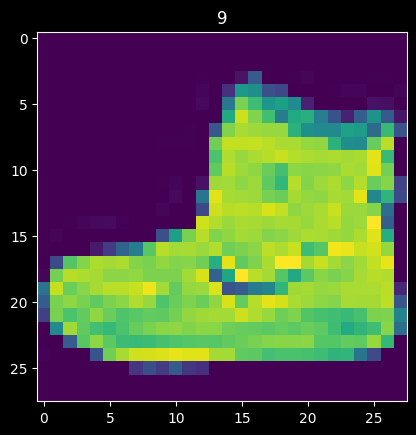

In [7]:
# Create the tuple
image, label = train_data[0]
print(f"Image shape: {image.shape}")

# Plot the image
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

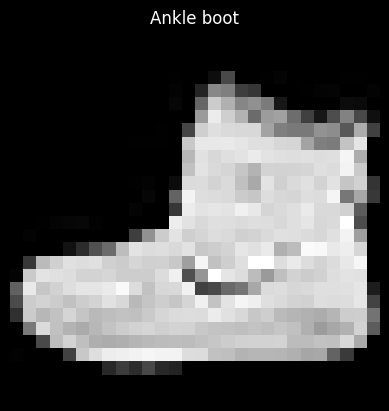

In [8]:
# Plot the grayscale image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])\

# Axis off
plt.axis(False)

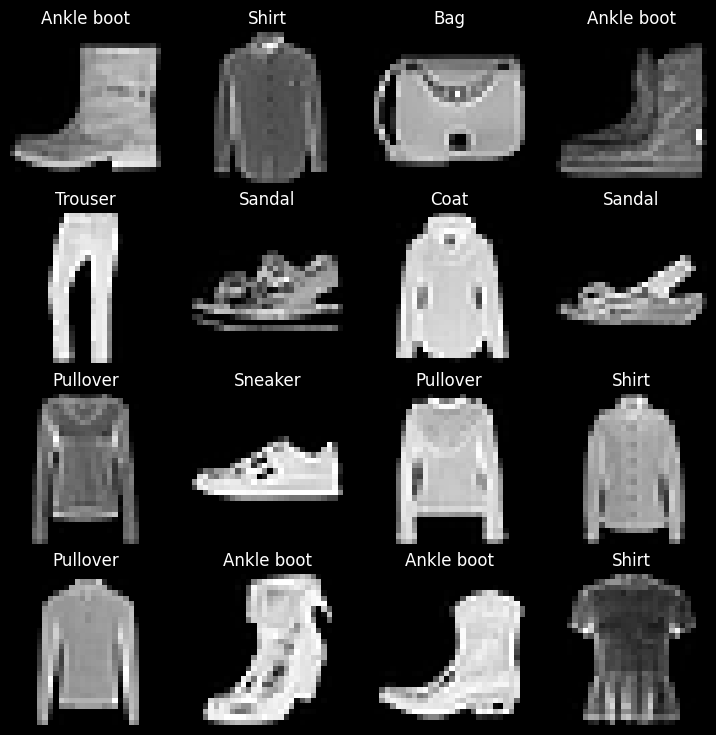

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)
  
  

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we need non-linear lines?

## 2. Perpare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our datasets into python iterable.

More specifically, we want to turn our data into batches or (mini-batches)

Why would we do this?

1. It is more computationally effecient, as in, your computing hardware may not be able to look (store in memory) at 60,000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances  to update its gradients per epoch

In [10]:
train_data, test_data


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x127d55220>,
 <torch.utils.data.dataloader.DataLoader at 0x124b8d100>)

In [12]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x127d55220>, <torch.utils.data.dataloader.DataLoader object at 0x124b8d100>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [13]:
# Check out what's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


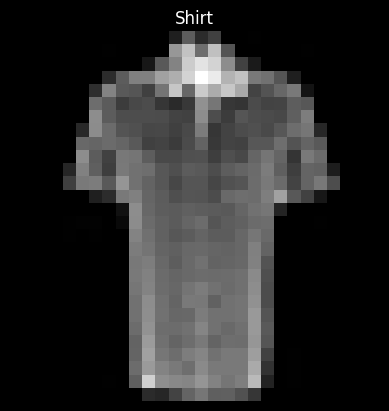

In [14]:
# Set the seed for reproducibility
torch.manual_seed(42)

# Generate a random index
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# Get the image and label from the batches using the random index
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Display the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label.item()])  # Ensure the label is a Python integer
plt.axis('off')  # Turn off the axis

# Print the image and label information
print(f"Image size: {img.shape}")
print(f"Label: {label.item()}, label size: {label.shape}")
